# **EduVision**

**Student Academic Recommendation System**

Import necessary libraries

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import pandas as pd
import pickle
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize

Load the dataset

In [59]:
df = pd.read_csv("/content/realistic_balanced_student_data.csv")

Basic Data Shape and Info

In [60]:
print("Dataset Shape (Rows, Columns):", df.shape)

Dataset Shape (Rows, Columns): (99999, 11)


In [61]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   StudentID        99999 non-null  object
 1   Gender           99999 non-null  object
 2   Grade            99999 non-null  int64 
 3   Internet Access  99999 non-null  object
 4   Maths            99999 non-null  int64 
 5   Science          99999 non-null  int64 
 6   English          99999 non-null  int64 
 7   History          99999 non-null  int64 
 8   Computer         99999 non-null  int64 
 9   Attendance(%)    99999 non-null  int64 
 10  Recommendation   99999 non-null  object
dtypes: int64(7), object(4)
memory usage: 8.4+ MB
None


In [62]:
print("\nFirst 5 Rows of the Dataset:")
print(df.head())


First 5 Rows of the Dataset:
  StudentID  Gender  Grade Internet Access  Maths  Science  English  History  \
0    S00001    Male      9             Yes     75       79       65       65   
1    S00002    Male      9             Yes     70       65       59       64   
2    S00003    Male     12             Yes     54       60       47       44   
3    S00004    Male      9             Yes     65       70       68       60   
4    S00005  Female     10             Yes     63       75       61       54   

   Computer  Attendance(%)                 Recommendation  
0        92             89  Eligible for Advanced Courses  
1        53             92              Needs Improvement  
2        78             67              Needs Improvement  
3        81             82              Needs Improvement  
4        79             78              Needs Improvement  


Summary Statistics

In [63]:
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
              Grade         Maths       Science       English       History  \
count  99999.000000  99999.000000  99999.000000  99999.000000  99999.000000   
mean      10.501005     67.186082     67.165002     62.306993     62.344713   
std        1.119125     19.700889     19.710838     20.141642     20.161483   
min        9.000000     30.000000     30.000000     30.000000     30.000000   
25%        9.000000     49.000000     49.000000     44.000000     44.000000   
50%       11.000000     69.000000     69.000000     64.000000     64.000000   
75%       12.000000     84.000000     84.000000     79.000000     79.000000   
max       12.000000    100.000000    100.000000    100.000000    100.000000   

           Computer  Attendance(%)  
count  99999.000000   99999.000000  
mean      71.196132      85.111421  
std       20.780043       9.646505  
min       30.000000      50.000000  
25%       53.000000      79.000000  
50%       73.000000      86.000000  
75%     

Check for Missing Values

In [64]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
StudentID          0
Gender             0
Grade              0
Internet Access    0
Maths              0
Science            0
English            0
History            0
Computer           0
Attendance(%)      0
Recommendation     0
dtype: int64


Distribution of Target Variable (Recommendation)

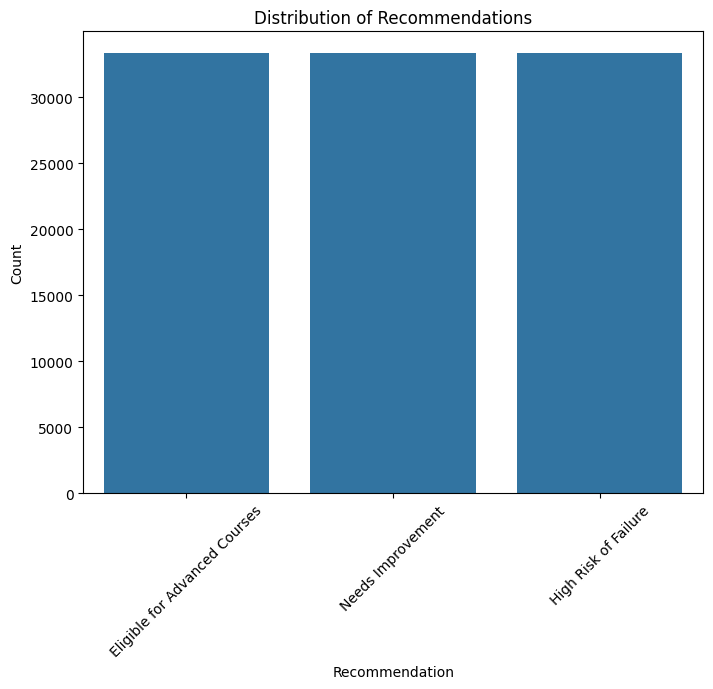

In [65]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Recommendation', data=df)
plt.title('Distribution of Recommendations')
plt.xlabel('Recommendation')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Distribution of Features

<Figure size 1200x800 with 0 Axes>

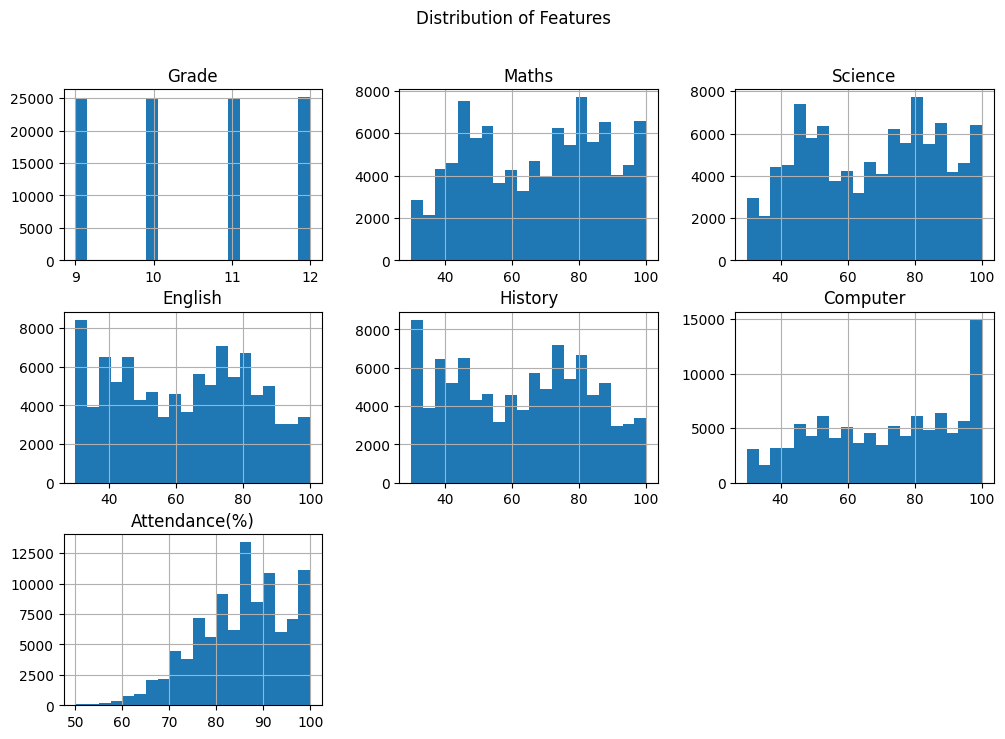

In [66]:
plt.figure(figsize=(12, 8))
df.hist(bins=20, figsize=(12, 8))
plt.suptitle('Distribution of Features')
plt.show()

Box Plots for Outlier Detection

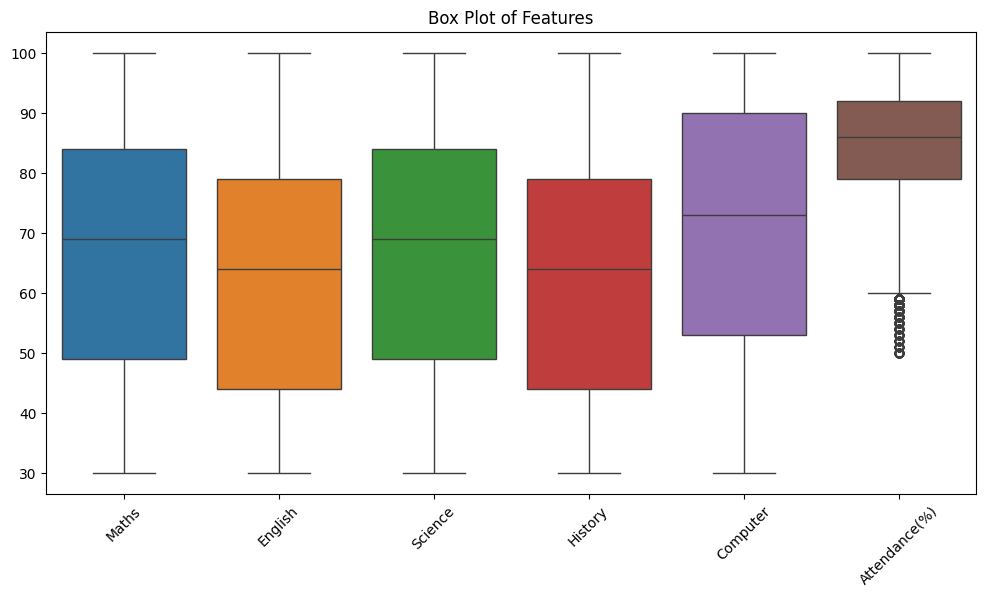

In [84]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Maths', 'English', 'Science', 'History', 'Computer', 'Attendance(%)']])
plt.title('Box Plot of Features')
plt.xticks(rotation=45)
plt.show()

Correlation Matrix

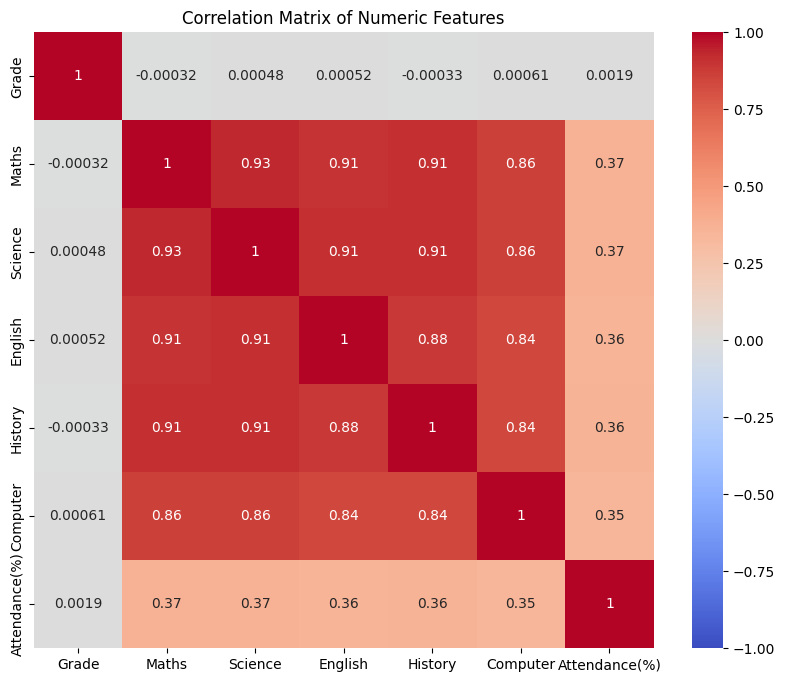

In [68]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

Features and target

In [69]:
X = df[["Maths", "Science", "English", "History", "Computer", "Attendance(%)"]]
y = df["Recommendation"]

Encode target if needed

In [70]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

Train-test split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

Train the model

In [72]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate

In [73]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

                               precision    recall  f1-score   support

Eligible for Advanced Courses       0.99      1.00      0.99      6725
         High Risk of Failure       0.98      1.00      0.99      6559
            Needs Improvement       1.00      0.97      0.98      6716

                     accuracy                           0.99     20000
                    macro avg       0.99      0.99      0.99     20000
                 weighted avg       0.99      0.99      0.99     20000



Save the trained model

In [74]:
with open("student_recommendation_model.pkl", "wb") as f:
    pickle.dump(clf, f)

Save the LabelEncoder too (important for decoding predictions)

In [75]:
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

Load the model & LabelEncoder then predict

In [76]:
with open("/content/student_recommendation_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("/content/label_encoder.pkl", "rb") as f:
    label_encoder = pickle.load(f)

sample_input = [[40, 32, 20, 24, 15, 12]]  # Marks + Attendance
predicted_class = model.predict(sample_input)
predicted_label = label_encoder.inverse_transform(predicted_class)

print("Predicted Recommendation:", predicted_label[0])

Predicted Recommendation: High Risk of Failure


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Evaluate

In [77]:
y_pred = clf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:
                               precision    recall  f1-score   support

Eligible for Advanced Courses       0.99      1.00      0.99      6725
         High Risk of Failure       0.98      1.00      0.99      6559
            Needs Improvement       1.00      0.97      0.98      6716

                     accuracy                           0.99     20000
                    macro avg       0.99      0.99      0.99     20000
                 weighted avg       0.99      0.99      0.99     20000



Confusion Matrix

In [78]:
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)


Confusion Matrix:
[[6707    0   18]
 [   0 6552    7]
 [  81  133 6502]]


Accuracy

In [79]:
accuracy = np.mean(y_pred == y_test)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.99


ROC Curve (Multiclass)

In [80]:
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Assuming 0, 1, 2 are encoded classes
y_score = clf.predict_proba(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

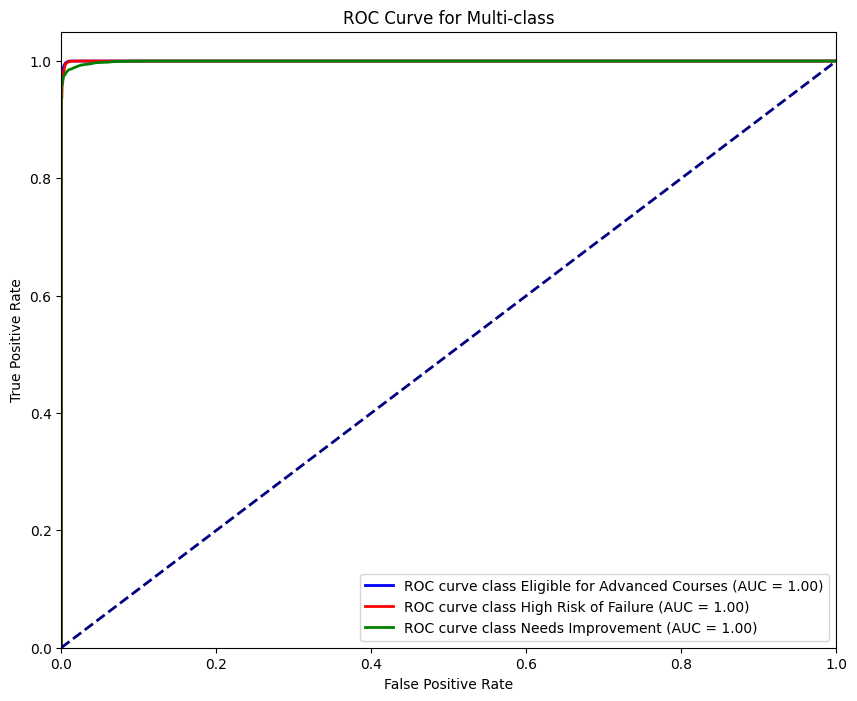

In [81]:
# Plot ROC Curve
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class')
plt.legend(loc="lower right")
plt.show()

Precision-Recall Curve

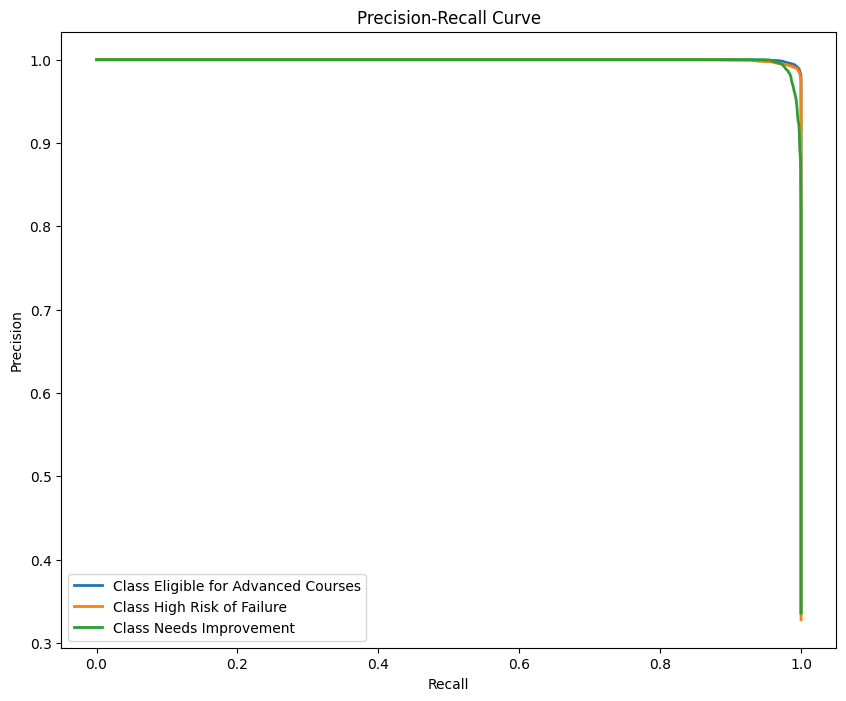

In [82]:
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {le.classes_[i]}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()

Confusion Matrix Heatmap

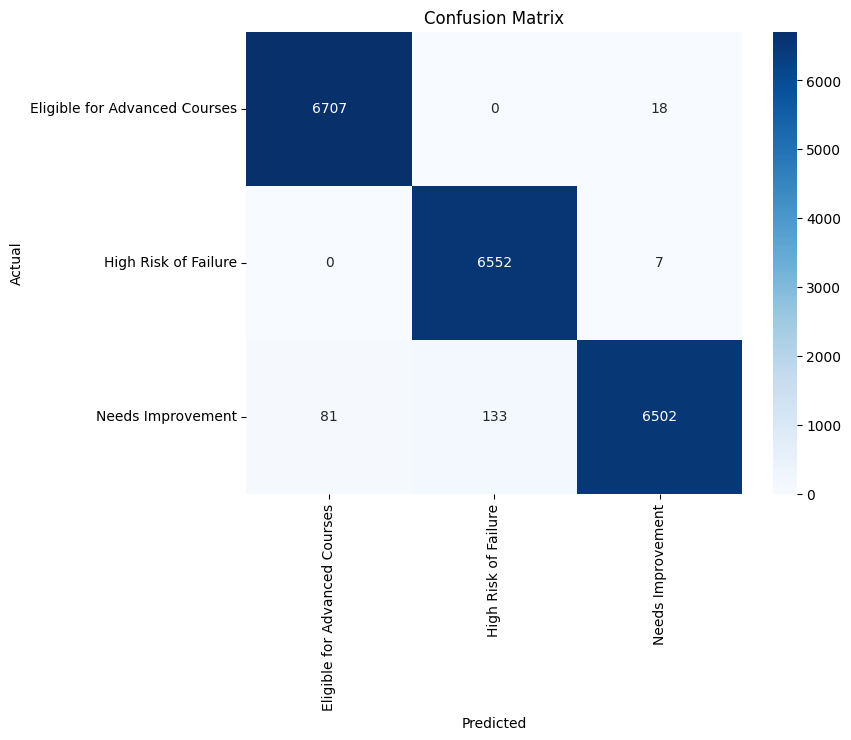

In [83]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()